In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Home Loan DS.csv")

In [3]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [7]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [9]:
df['Gender'].fillna('Female', inplace=True)

In [10]:
df['Married'].fillna('No', inplace=True)
df['Self_Employed'].fillna('No', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df['Dependents'].replace('3+', '3', inplace=True)
df['Dependents'].bfill(inplace=True)
df['Dependents'] = df['Dependents'].astype('int64')

In [13]:
for col in df.select_dtypes(include='float64').columns:
    df[col] = df[col].fillna(df[col].mean())

In [14]:
df.isnull().sum().sum()

np.int64(0)

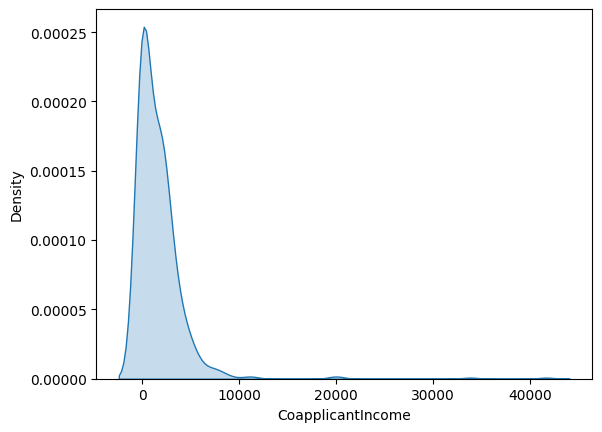

In [15]:
sns.kdeplot(df['CoapplicantIncome'], fill=True)
plt.show()

In [16]:
from sklearn.preprocessing import FunctionTransformer

In [17]:
log_transformer = FunctionTransformer(np.log1p, validate=True)

df['CoapplicantIncome_ft'] = log_transformer.fit_transform(df[['CoapplicantIncome']])

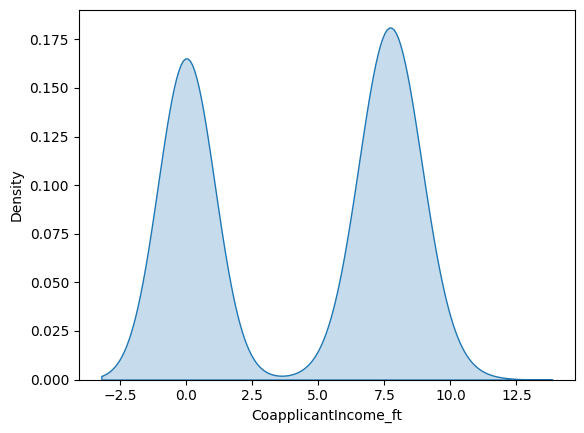

In [18]:
sns.kdeplot(df['CoapplicantIncome_ft'], fill=True)
plt.show()

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

df['CoapplicantIncome_pt'] = pt.fit_transform(df[['CoapplicantIncome']])


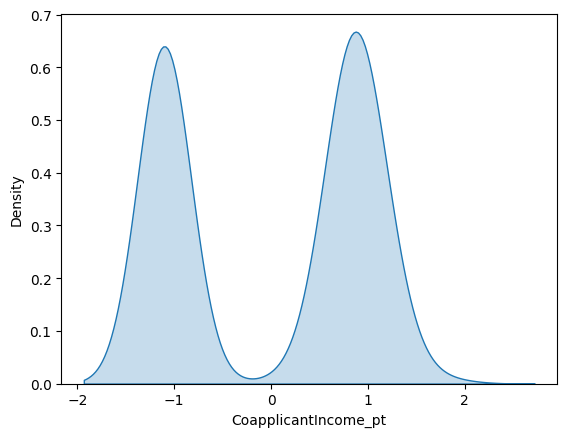

In [20]:
sns.kdeplot(df['CoapplicantIncome_pt'], fill=True)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    object 
 2   Married               614 non-null    object 
 3   Dependents            614 non-null    int64  
 4   Education             614 non-null    object 
 5   Self_Employed         614 non-null    object 
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            614 non-null    float64
 9   Loan_Amount_Term      614 non-null    float64
 10  Credit_History        614 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  CoapplicantIncome_ft  614 non-null    float64
 14  CoapplicantIncome_pt  614 non-null    float64
dtypes: float64(6), int64(2)

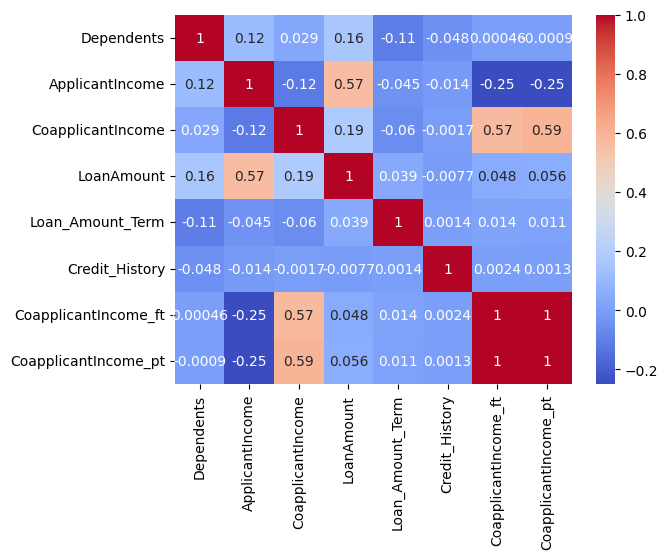

In [22]:
num_col = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(num_col.corr(), annot=True, cmap='coolwarm')
plt.show()

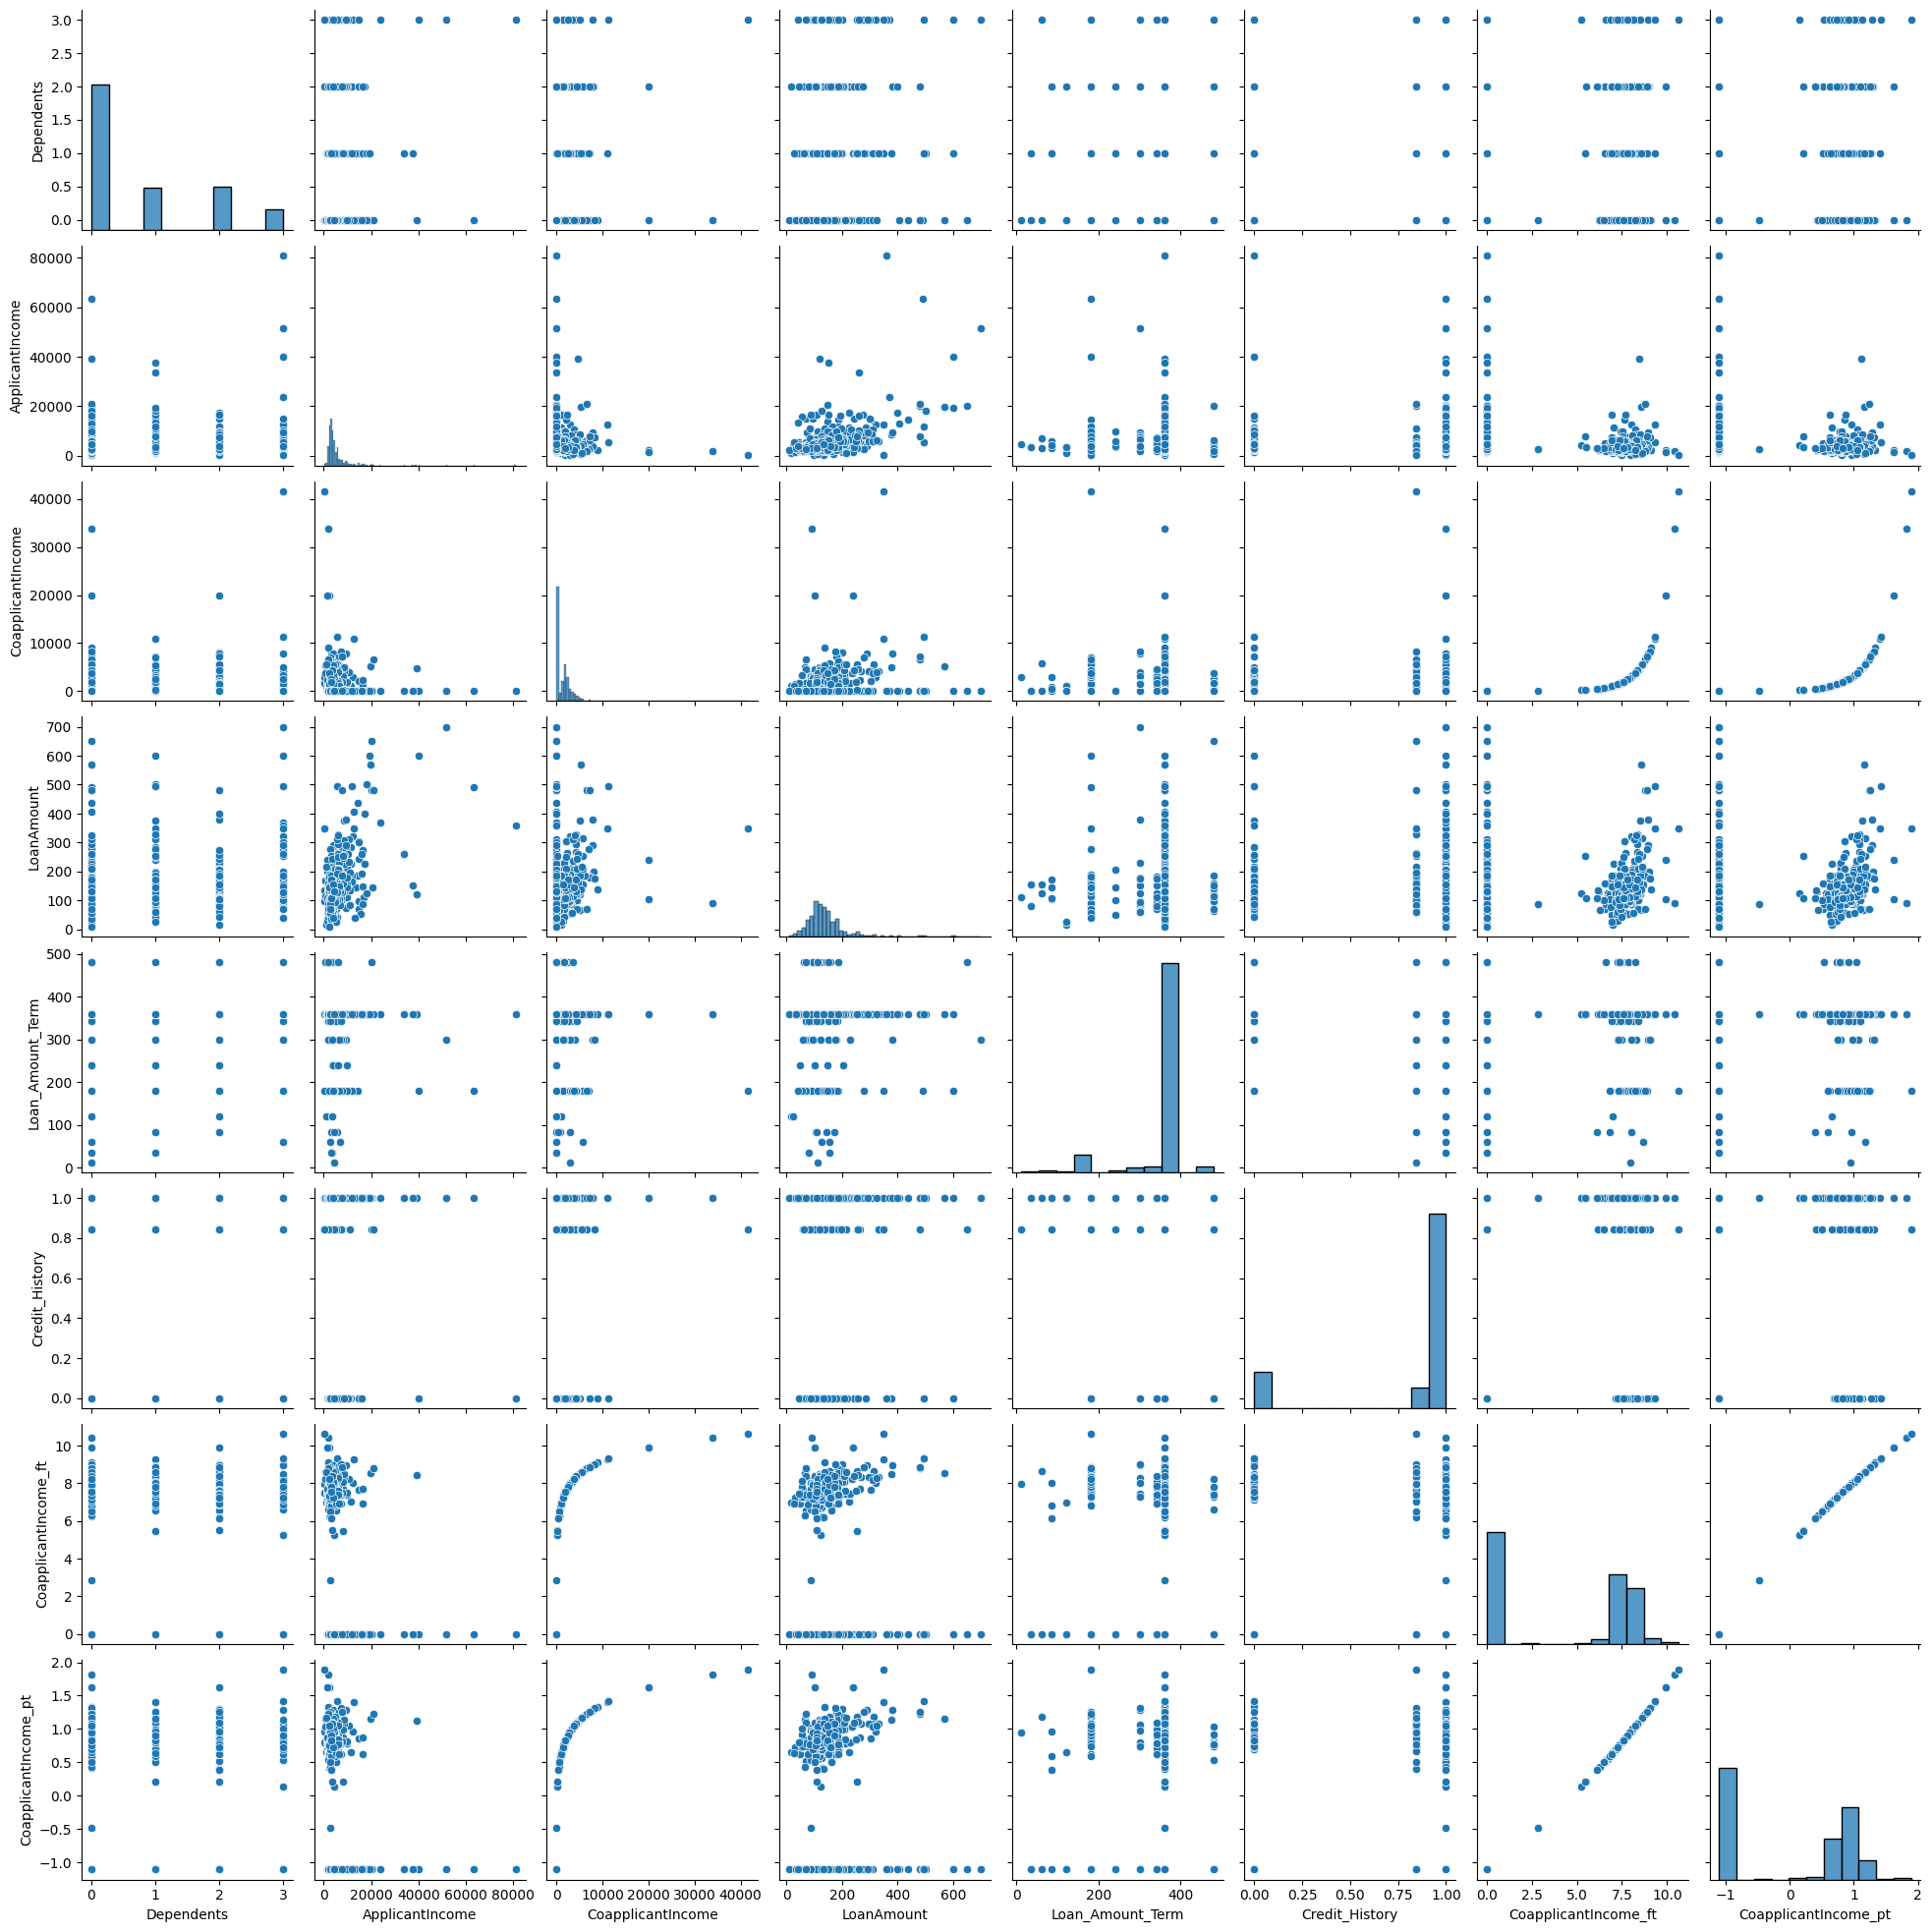

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
df.drop(columns=['Loan_ID', 'CoapplicantIncome_ft', 'CoapplicantIncome_pt'], index=1, inplace=True)

In [25]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y


In [27]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [28]:
x.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
76,Male,No,0,Graduate,No,3750,4750.0,176.0,360.0,1.000000,Urban
241,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.000000,Urban
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,0.842199,Semiurban


In [29]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in x.select_dtypes(include=['int64', 'float64']).columns:
    x[col] = mms.fit_transform(x[[col]])

In [30]:
x.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,0.070489,0.000000,0.198860,0.74359,1.0,Urban
2,Male,Yes,0.0,Graduate,Yes,0.035250,0.000000,0.082489,0.74359,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,0.030093,0.056592,0.160637,0.74359,1.0,Urban


In [31]:
x.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.253399,0.064994,0.038914,0.198903,0.705065,0.841941
std,0.337595,0.075621,0.070287,0.121712,0.137652,0.349908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033717,0.000000,0.131693,0.743590,1.000000
50%,0.000000,0.045294,0.028008,0.173661,0.743590,1.000000
75%,0.666667,0.069882,0.055248,0.225760,0.743590,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Encoding Technique

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             613 non-null    object 
 1   Married            613 non-null    object 
 2   Dependents         613 non-null    float64
 3   Education          613 non-null    object 
 4   Self_Employed      613 non-null    object 
 5   ApplicantIncome    613 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         613 non-null    float64
 8   Loan_Amount_Term   613 non-null    float64
 9   Credit_History     613 non-null    float64
 10  Property_Area      613 non-null    object 
dtypes: float64(6), object(5)
memory usage: 57.5+ KB


In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(drop='first', dtype=np.int32)

obj_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
num_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

ct = ColumnTransformer(transformers=[
    ('ohe', ohe, obj_cols)
], remainder='passthrough')

In [45]:
encoded_x = ct.fit_transform(x)

In [47]:
col = ct.get_feature_names_out()
x = pd.DataFrame(encoded_x, columns=col)

In [48]:
x.sample(4)

,ohe__Gender_Male,ohe__Married_Yes,ohe__Education_Not Graduate,ohe__Self_Employed_Yes,ohe__Property_Area_Semiurban,ohe__Property_Area_Urban,remainder__Dependents,remainder__ApplicantIncome,remainder__CoapplicantIncome,remainder__LoanAmount,remainder__Loan_Amount_Term,remainder__Credit_History
184,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.482338,0.113999,0.160637,0.74359,1.0
307,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.248398,0.000000,0.681621,0.74359,1.0
467,0.0,1.0,1.0,0.0,1.0,0.0,0.666667,0.000742,0.070007,0.128799,0.74359,1.0
578,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.037502,0.070007,0.219971,0.74359,1.0


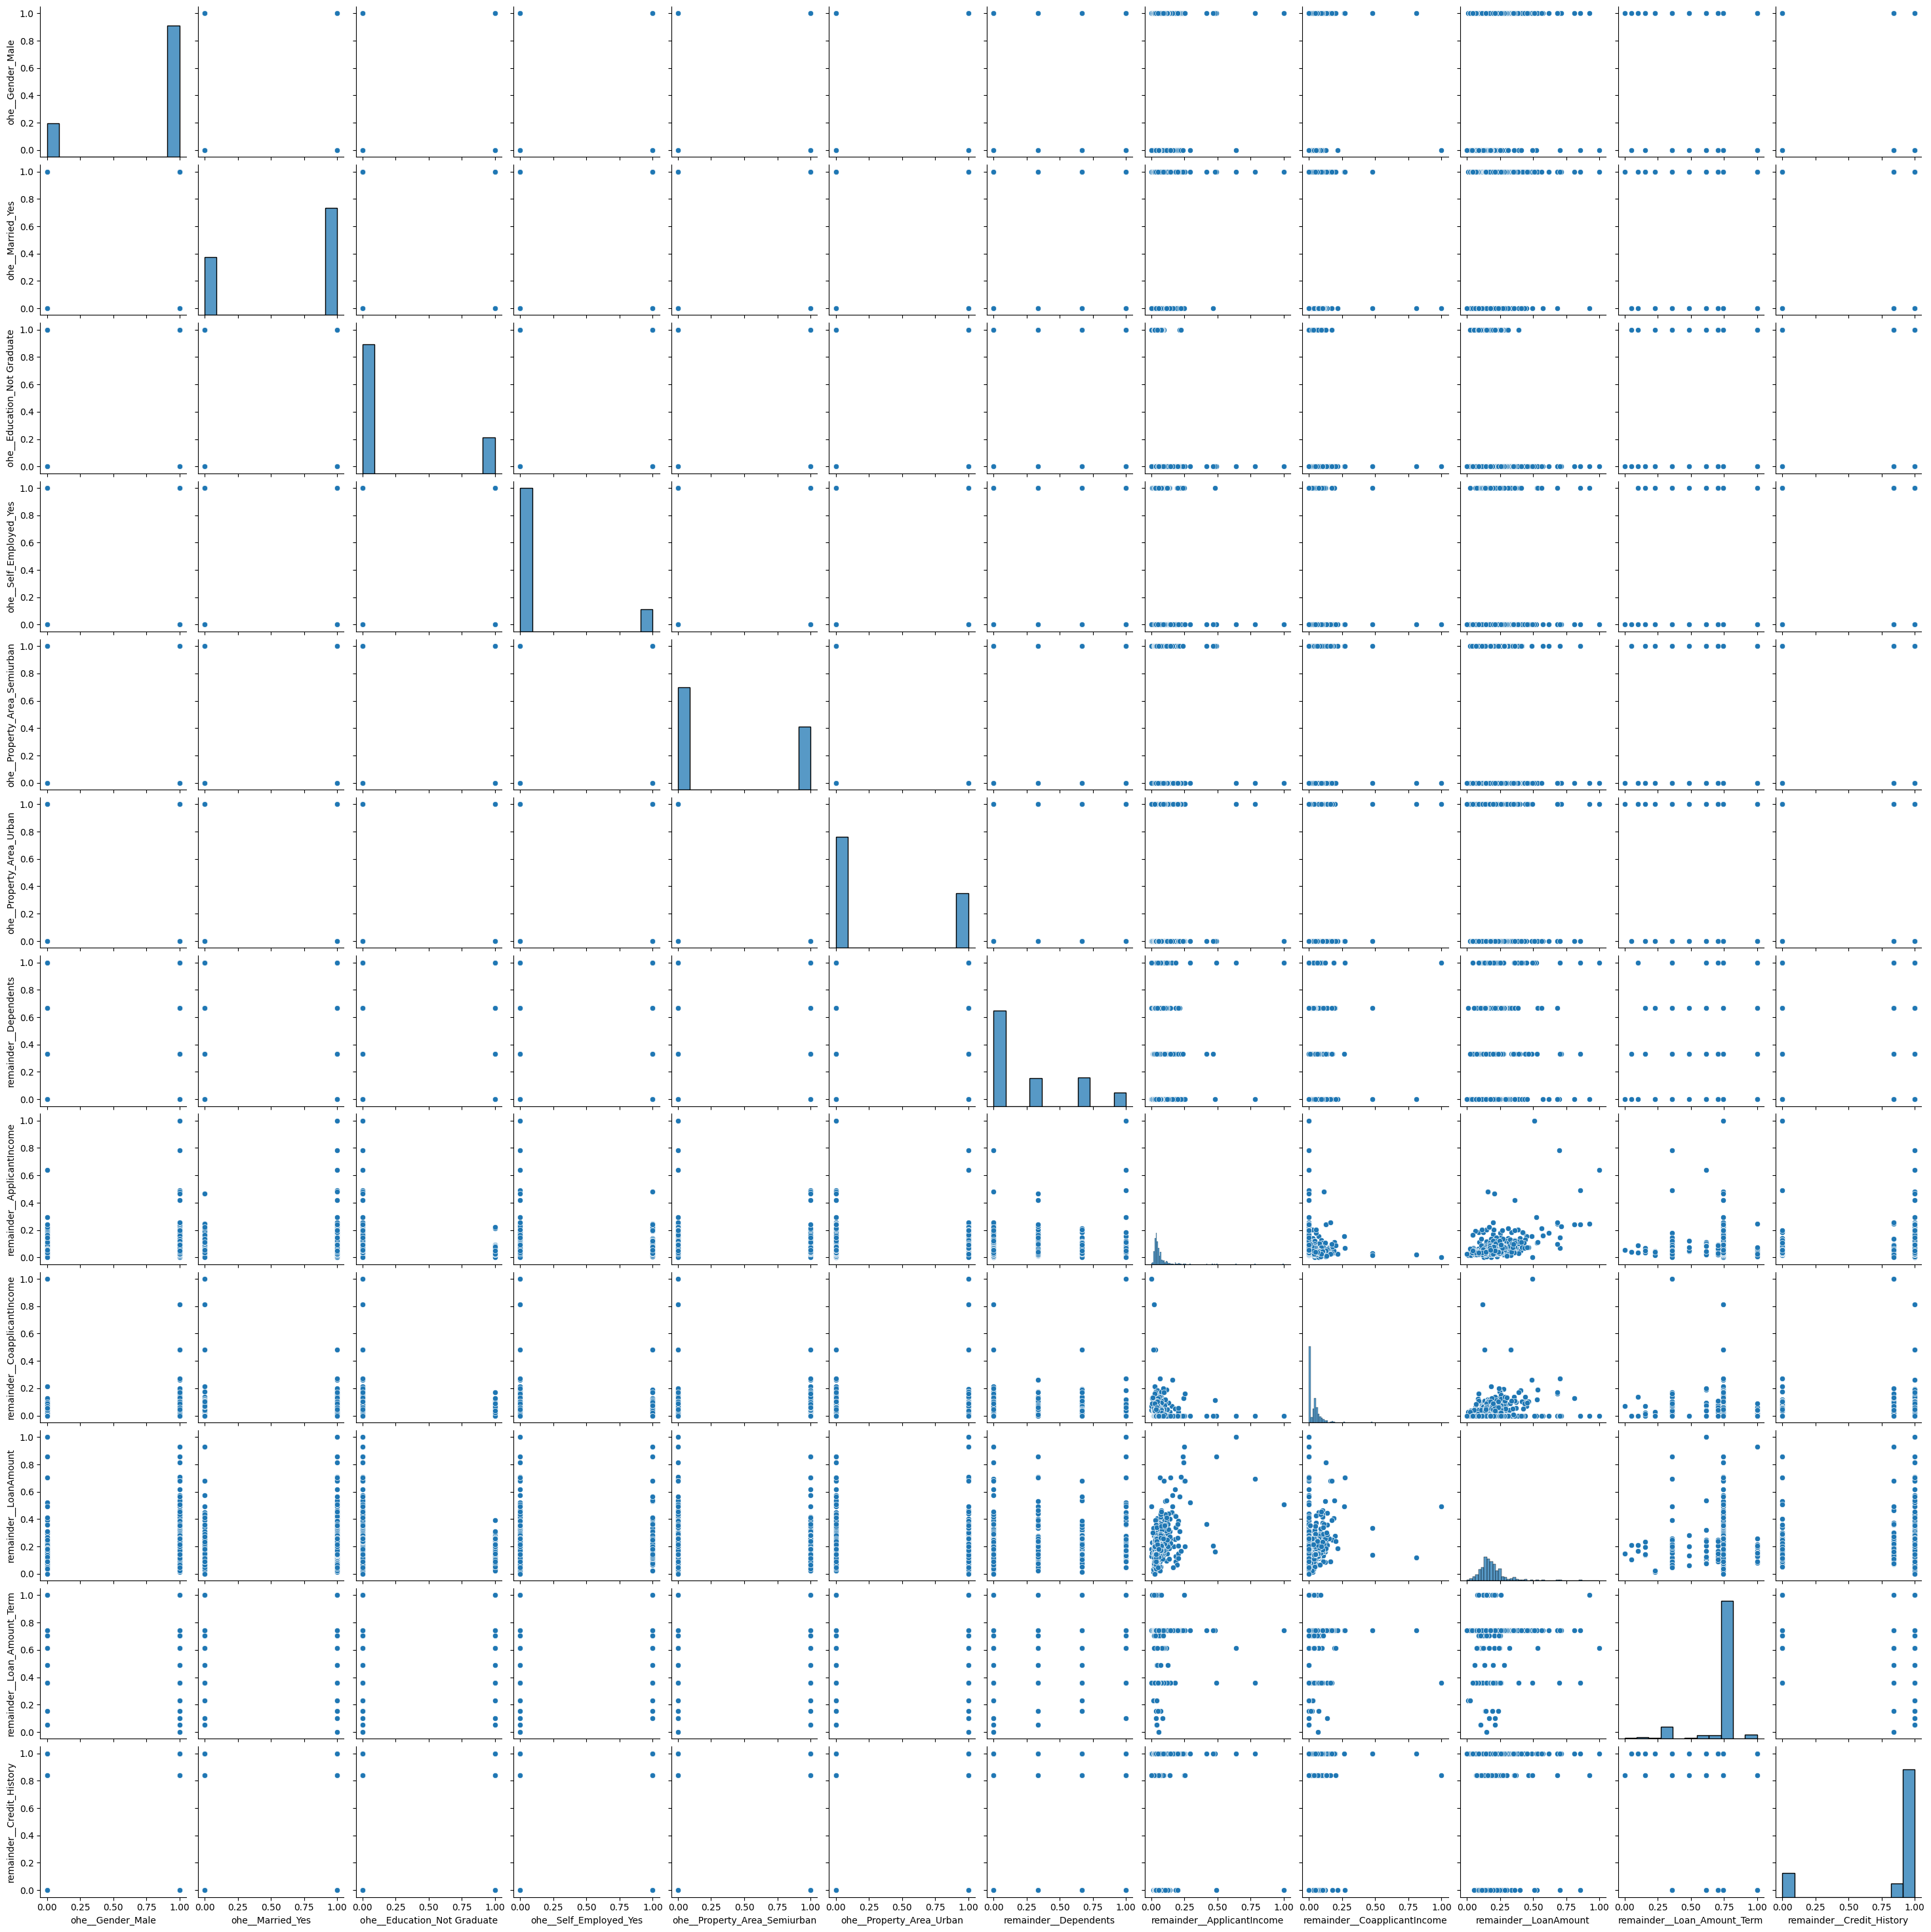

In [49]:
sns.pairplot(x)
plt.show()

## Feature Selection Techniques

In [61]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

model = LogisticRegression()

sfs = SequentialFeatureSelector(model, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='r2', 
          cv=5)

sfs.fit(x,y)
selected_features = list(sfs.k_feature_names_)
print("Selected Features:", selected_features)

Selected Features: ['ohe__Gender_Male']
